##DATASET : https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset

# 1. Business Understanding

### Objetivo

Desenvolver um modelo de Machine Learning capaz de avaliar automaticamente a compatibilidade de currículos com vagas, gerando um score que auxilia sistemas de recrutamento na priorização de perfis, reduzindo tempo de triagem e aumentando assertividade.

### Problema de Negócio

Empresas recebem muitos currículos e o processo manual de triagem é:

- demorado

- subjetivo

- propenso a erros

- caro

Isso faz bons candidatos serem ignorados e aumenta o tempo de contratação.

### Oportunidade

Automatizar essa etapa torna o processo:

- mais rápido

- mais preciso

- padronizado

- menos enviesado

E melhora tanto a experiência do RH quanto dos candidatos.

### Critério de Sucesso

- Prever o score com boa performance

- Reduzir a triagem manual

- Gerar um sistema integrável via API


## 2. DATA UNDERSTANDING


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier

In [130]:
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

In [131]:
df = pd.read_csv("resume_data.csv", encoding="latin1")

In [132]:
df.shape

(9544, 35)

In [133]:
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,ï»¿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapreduce', 'Spark', 'Java', 'Machine Learning', 'Cloud', 'Hdfs', 'YARN', 'Core Java', 'Data Science', 'C++', 'Data Structures', 'DBMS', 'RDBMS', 'Informatica', 'Talend', 'Amazon Redshift', 'Microsoft Azure']","['The Amity School of Engineering & Technology (ASET), Noida']",['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a reputed university.,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaboration\nDocumentation\nSystem Monitoring\nSoftware Deployment\nTraining & Mentorship\nIndustry Trends\nField Visits\n\n\n\n\n,NaN,0.85
1,NaN,Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models.,"['Data Analysis', 'Data Analytics', 'Business Analysis', 'R', 'SAS', 'PowerBi', 'Tableau', 'Data Visualization', 'Business Analytics', 'Machine Learning']","['Delhi University - Hansraj College', 'Delhi University - Hansraj College']","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in any relevant discipline from a reputed University,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional Collaboration\nStrategy Development\nML/NLP Infrastructure\nPrototype Transformation\nML System Design\nAlgorithm Research\nApplication Development\nDataset Selection\nML Testing\nStatistical Analysis\nR&D in ML/NLP\nText Representation\nData Pipeline Design\nStatistical Data Analysis\nModel Training\nTeam Collaboration\nResearch Reporting\nAlgorithm Analysis,NaN,0.75
2,NaN,NaN,"['Software Development', 'Machine Learning', 'Deep Learning', 'Risk Assessment', 'Requirement Gathering', 'Application Support', 'JavaScript', 'Python', 'Docker', 'HTML', 'Hive', 'CSS', 'C', 'C++']","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, Hygiene Products",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, Sales Targets\nField Marketing, Campaigns, Product Distribution\nBrand Head\nExcel, KPIs Tracking",Brand Promotion\nCampaign Management\nField Supervision\nMerchandising\npromotional activities\nTrade Marketing,0.42
3,NaN,"To obtain a position in a fast-paced business office environment, demanding a strong organizational, technical, and interpersonal position utilizing my skills and attributes.","['accounts payables', 'accounts receivables', 'Accounts Payable', 'Accounts Receivable', 'administrative functions', 'trial balance', 'banking', 'budget', 'bi', 'closing', 'Computer Applications', 'Credit', 'clients', 'Customer Service', 'data entry', 'delivery', 'driving', 'email', 'insurance', 'inventory', 'ledger', 'Access', 'Excel', 'Outlook', 'PowerPoint', 'Word', 'mortgage loan', 'Enterprise', 'policies', 'QuickBooks', 'Sales', 'sales reports', 'telecommunications', 'phone', 'workflow', 'written']","['Martinez Adult Education, Business Training Center Ã¯Â¼ City , State']",['Computer Applications Specialist Certificate

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [135]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
address,784,28,"Sunnyvale, CA",28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
career_objective,4740,171,Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skills,9488,340,"['Python', 'MySQL', 'Tensorflow', 'Keras', 'Machine Learning', 'Deep Learning']",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational_institution_name,9460,328,"['Illinois Institute of Technology', 'National Institute of Technology']",112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_names,9460,180,['B.Tech'],1764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passing_years,9460,149,['2019'],1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational_results,9460,78,['N/A'],3612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result_types,9460,30,['N/A'],3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_field_of_studies,9460,210,['N/A'],616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
professional_company_names,9460,199,"['Company Name', 'Company Name', 'Company Name']",1204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df.isnull().sum().sort_values(ascending=False)
(df.isnull().mean() * 100).sort_values(ascending=False)


,0
languages,92.67
proficiency_levels,92.67
address,91.79
issue_dates,78.96
certification_skills,78.96
certification_providers,78.96
expiry_dates,78.96
online_links,78.96
extra_curricular_activity_types,64.10
extra_curricular_organization_links,64.10


In [137]:
df['matched_score'].describe()



,matched_score
count,9544.00
mean,0.66
std,0.17
min,0.00
25%,0.58
50%,0.68
75%,0.79
max,0.97


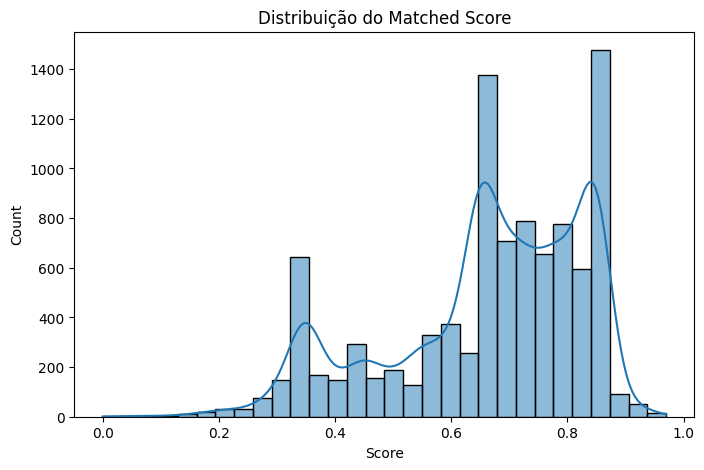

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(df['matched_score'], kde=True, bins=30)
plt.title("Distribuição do Matched Score")
plt.xlabel("Score")
plt.show()


In [139]:
df['skills'].sample(5, random_state=42).values
df['degree_names'].sample(5, random_state=42).values

array(["[None, 'General Diploma']",
       "['Mechanical-Industrial Engineering', 'Executive Management', 'Business Development']",
       "['B.Tech']", nan, "['B.Sc', 'M.Sc']"], dtype=object)

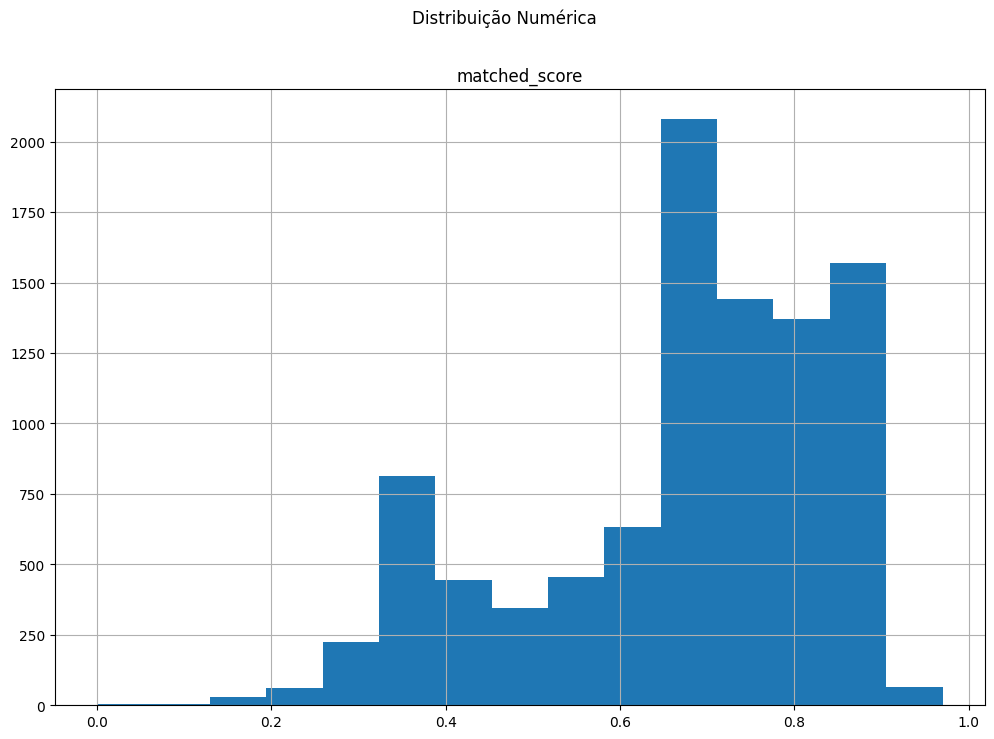

In [140]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12,8), bins=15)
plt.suptitle("Distribuição Numérica")
plt.show()

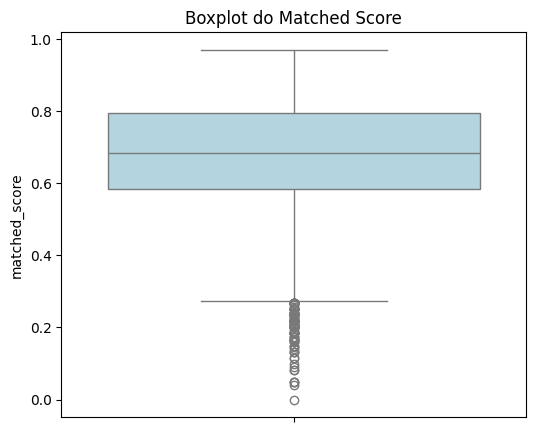

In [141]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['matched_score'], color="lightblue")
plt.title("Boxplot do Matched Score")
plt.show()

In [142]:
colunas_texto = ['skills', 'career_objective', 'major_field_of_studies',
                 'professional_company_names', 'languages', 'skills_required']

for col in colunas_texto:
    print(f"{col}: {df[col].notnull().sum()} registros preenchidos")


skills: 9488 registros preenchidos
career_objective: 4740 registros preenchidos
major_field_of_studies: 9460 registros preenchidos
professional_company_names: 9460 registros preenchidos
languages: 700 registros preenchidos
skills_required: 7843 registros preenchidos


In [143]:
df['skills_len'] = df['skills'].astype(str).apply(len)
df['career_len'] = df['career_objective'].astype(str).apply(len)

df[['skills_len', 'career_len']].describe()

,skills_len,career_len
count,9544.00,9544.00
mean,369.60,113.58
std,359.21,150.22
min,2.00,3.00
25%,159.00,3.00
50%,243.00,3.00
75%,503.00,210.00
max,3104.00,1425.00


## 3.DATA PREPARATION


In [144]:
colunas_utilizadas = [
    'career_objective',
    'skills',
    'major_field_of_studies',
    'professional_company_names',
    'languages',
    'skills_required',
    'matched_score'
]

df_model = df[colunas_utilizadas].copy()

In [145]:
df_model = df_model.fillna('')

In [146]:
df_model['curriculo_texto'] = (
    df_model['career_objective'] + ' ' +
    df_model['skills'] + ' ' +
    df_model['major_field_of_studies'] + ' ' +
    df_model['professional_company_names'] + ' ' +
    df_model['languages']
).str.strip()

In [147]:
df_model['vaga_texto'] = df_model['skills_required']

In [148]:
df_model['texto_completo'] = (
    df_model['curriculo_texto'] + ' ' + df_model['vaga_texto']
).str.strip()


In [149]:
df_model['matched_score'] = pd.to_numeric(df_model['matched_score'], errors='coerce')
df_model = df_model[df_model['matched_score'].notnull()].reset_index(drop=True)

print("Total de linhas após limpeza:", df_model.shape[0])

Total de linhas após limpeza: 9544


In [150]:
X = df_model['texto_completo']
y = df_model['matched_score']


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Regressão - Tamanho treino:", X_train.shape)
print("Regressão - Tamanho teste:", X_test.shape)


Regressão - Tamanho treino: (7158,)
Regressão - Tamanho teste: (2386,)


In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF Regressão:", X_train_tfidf.shape, X_test_tfidf.shape)


TF-IDF Regressão: (7158, 3377) (2386, 3377)


In [153]:
def categorizar(score):
    if score <= 0.50:
        return 0
    elif score <= 0.75:
        return 1
    else:
        return 2

df_model['classe'] = df_model['matched_score'].apply(categorizar)

In [154]:
X_class = df_model['texto_completo']
y_class = df_model['classe']

In [155]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_class,
    test_size=0.25,
    random_state=42,
    stratify=y_class
)

print("Classificação - Tamanho treino:", Xc_train.shape)
print("Classificação - Tamanho teste:", Xc_test.shape)

Classificação - Tamanho treino: (7158,)
Classificação - Tamanho teste: (2386,)


In [156]:
vectorizer_class = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

Xc_train_tfidf = vectorizer_class.fit_transform(Xc_train)
Xc_test_tfidf = vectorizer_class.transform(Xc_test)

print("TF-IDF Classificação:", Xc_train_tfidf.shape, Xc_test_tfidf.shape)

TF-IDF Classificação: (7158, 3377) (2386, 3377)


# 4. Modeling

Nesta etapa foram aplicados algoritmos de Machine Learning ao conjunto de dados preparado, com o objetivo de construir dois tipos diferentes de modelos:

#### 1. Modelo de Regressão — XGBoostRegressor

O primeiro modelo utiliza o algoritmo XGBoost Regressor, que prevê o valor contínuo matched_score (0 a 1), representando o nível de compatibilidade entre um currículo e uma vaga.


#### 2. Modelo de Classificação — RandomForestClassifier

Além do modelo contínuo, o matched_score foi convertido em classes:

0 = baixa compatibilidade (≤ 50%)

1 = média compatibilidade (50%–75%)

2 = alta compatibilidade (> 75%)

Com essas categorias, treinamos um modelo Random Forest Classifier, adequado para classificação multi-classe.


#### 3. Técnicas aplicadas

Vetorização TF-IDF para transformar currículos em matrizes numéricas

Separação treino/teste com estratificação no modelo de classificação

Execução de .fit() e .predict() em ambos os modelos

Comparação entre predições reais e estimadas


In [157]:
modelo_reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [158]:
modelo_reg.fit(X_train_tfidf, y_train)

print("Modelo 1 treinado: XGBRegressor")

Modelo 1 treinado: XGBRegressor


In [159]:
y_pred_reg = modelo_reg.predict(X_test_tfidf)

In [160]:
modelo_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

In [161]:
modelo_rf.fit(Xc_train_tfidf, yc_train)

print("Modelo 2 treinado: RandomForestClassifier")

Modelo 2 treinado: RandomForestClassifier


In [162]:
y_pred_rf = modelo_rf.predict(Xc_test_tfidf)

In [163]:
print("Exemplo de predições XGBRegressor:", y_pred_reg[:10])
print("Exemplo de predições Random Forest:", y_pred_rf[:10])

Exemplo de predições XGBRegressor: [0.6293736  0.62475276 0.43416116 0.67428386 0.75848234 0.53317106
 0.6040582  0.7599819  0.7182521  0.6802487 ]
Exemplo de predições Random Forest: [1 1 2 1 2 0 1 1 1 2]


## 5. Evaluations


Modelo de Regressão (XGBoost)

In [164]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))

print("== Avaliação do Modelo de Regressão (XGBoost) ==\n")
print("R²:", r2)
print("\nMAE:", mae)
print("\nRMSE:", rmse)

== Avaliação do Modelo de Regressão (XGBoost) ==

R²: 0.6229195335471698

MAE: 0.07772216653524384

RMSE: 0.10251980344524081


Modelo de Classificação (RandomForest)


In [165]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_rf = modelo_rf.predict(Xc_test_tfidf)

acc_rf = accuracy_score(yc_test, y_pred_rf)
matriz_rf = confusion_matrix(yc_test, y_pred_rf)

print("== Avaliação do Modelo de Classificação (RandomForest) ==\n")
print("Acurácia:", acc_rf)
print("\nRelatório de Classificação:\n", classification_report(yc_test, y_pred_rf))


== Avaliação do Modelo de Classificação (RandomForest) ==

Acurácia: 0.6609388097233864

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60       452
           1       0.66      0.68      0.67      1133
           2       0.70      0.67      0.68       801

    accuracy                           0.66      2386
   macro avg       0.65      0.65      0.65      2386
weighted avg       0.66      0.66      0.66      2386



##6.Deployment


In [166]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
import joblib

In [167]:
pipeline_reg = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('regressor', XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [168]:
pipeline_reg.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [169]:
exemplo = X.sample(1).values[0]
print("Texto de exemplo:", exemplo)
print("Previsão:", pipeline_reg.predict([exemplo]))


Texto de exemplo: ['Perl', 'Java', 'C++', 'HTML', 'PHP', 'MySQL', 'Scheme', 'MatLab', 'Microsoft Office', 'Adobe Photoshop', 'Adobe Dreamweaver', '3ds Max', 'Windows (95, 98, 2000, XP, Vista)', 'Mac OS', 'Linux', 'Self-motivated', 'Creative thinker', 'Detail-oriented', 'Excellent time management skills'] ['Computer Science'] ['ABC Research', 'Library Application Services, NSU', 'Computer Science Departments, NSU', 'YMCA'] Brand Promotion
Campaign Management
Field Supervision
Merchandising
promotional activities
Trade Marketing
Previsão: [0.7564579]


In [170]:
import joblib

joblib.dump(pipeline_reg, "pipeline_xgboost.pkl")
print("Pipeline salvo como pipeline_xgboost.pkl")

Pipeline salvo como pipeline_xgboost.pkl


In [171]:
pip install xgboost